In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Bluepal\Desktop\Data_Analytics_Employees\Excell_sheets\clean_employee_dataset.csv", sep=';')

def safe_split_multi_sep(x):
    if pd.isna(x):
        return []
    x = str(x).replace(';', ',')      
    return [i.strip().title() for i in x.split(',') if i.strip() != '']

df['department'] = df['department'].apply(safe_split_multi_sep)
df['skills'] = df['skills'].apply(safe_split_multi_sep)

In [9]:
df['performance_score'] = pd.to_numeric(df['performance_score'], errors='coerce')
df_clean = df.dropna(subset=['performance_score', 'salary'])
df_plot = df_clean[df_clean['salary'] > 0]
len(df_plot)


39

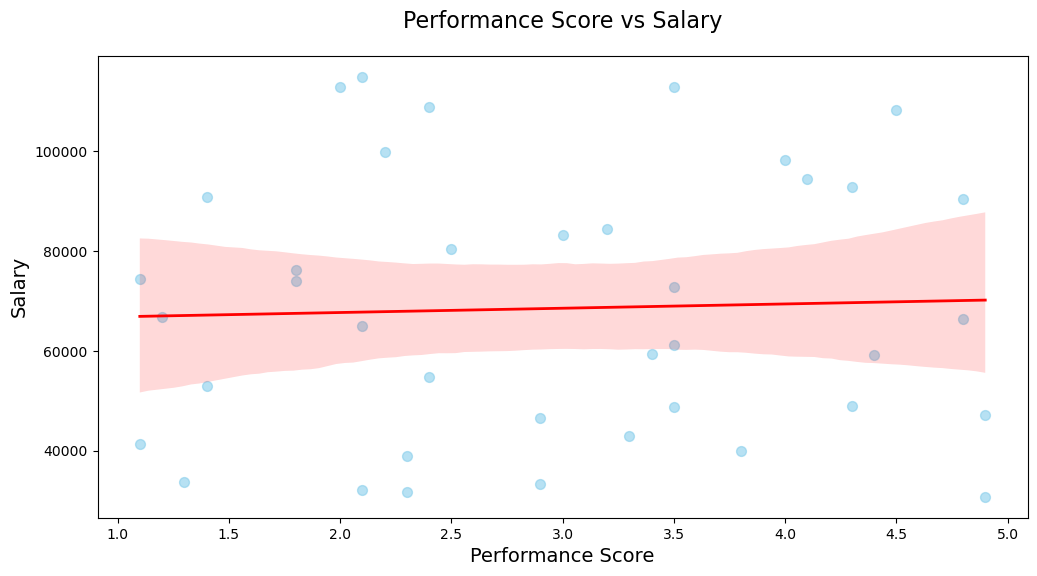

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.regplot(
    x='performance_score',
    y='salary',
    data=df_plot,
    scatter_kws={'s':50, 'alpha':0.6, 'color':'skyblue'},
    line_kws={'color':'red', 'linewidth':2}
)

plt.title('Performance Score vs Salary', fontsize=16, pad=20)
plt.xlabel('Performance Score', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.show()